In [2]:
%matplotlib notebook

import cv2
import matplotlib.pyplot as plt
import signal
import numpy as np

In [3]:
def signal_handler(signal, frame):
    # KeyboardInterrupt detected, exiting
    global is_interrupted
    is_interrupted = True

In [4]:
face_cascade = cv2.CascadeClassifier('face.xml')
eye_cascade = cv2.CascadeClassifier('eye.xml')
smile_cascade = cv2.CascadeClassifier('smile.xml')

<IPython.core.display.Javascript object>


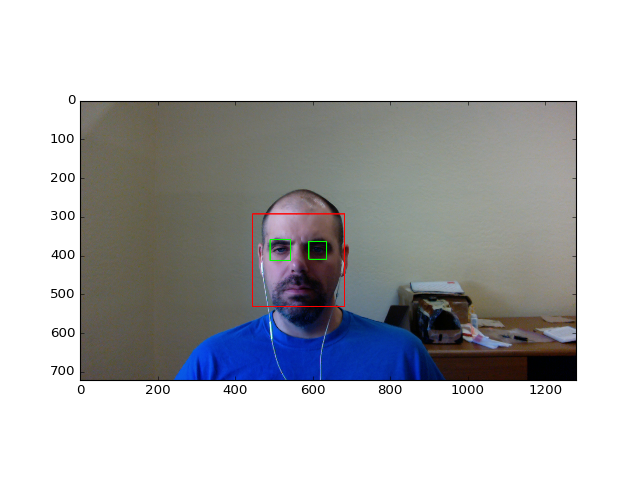

/usr/local/lib/python2.7/site-packages/matplotlib/backend_bases.py:2437: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


In [ ]:
vc = cv2.VideoCapture(0)

plt.ion()

if vc.isOpened(): # try to get the first frame
    is_capturing, raw = vc.read()
    frame = cv2.cvtColor(raw, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview = plt.imshow(raw)    
else:
    is_capturing = False

signal.signal(signal.SIGINT, signal_handler)

is_interrupted = False
while is_capturing:
    is_capturing, raw = vc.read()
    
    frame = cv2.cvtColor(raw, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            
        smiles = smile_cascade.detectMultiScale(roi_gray
                                                ,scaleFactor= 1.7
                                                ,minNeighbors=22
                                                ,minSize=(100, 50)
                                                ,flags=cv2.cv.CV_HAAR_SCALE_IMAGE)
        for (sx,sy,sw,sh) in smiles:
            cv2.rectangle(roi_color,(sx,sy),(sx+sw,sy+sh),(0,0,255),2)
      
   
    webcam_preview.set_data(frame)
    plt.draw()
    
    try:    # Avoids a NotImplementedError caused by `plt.pause`
        plt.pause(0.05)
    except Exception:
        pass
    if is_interrupted:
        vc.release()
        break